# Ice Online Game Store Analysis

## Overview

In this project we will analyze data from the online store Ice, which sells games all over the world.

The data includes the following details:

    1) Name of the game
    2) Platform
    3) Year of release
    4) Genre
    5) Sales, divided into the following regions: North America, Europe, Japan, and all other regions. 
    6) Score: rating by critics and users. 
    7) ESRB Rating: category of who the game is suitable for (everyone, teens, adults only). 

The data was recorded from the year 1980 until the year 2016. 

We imagine we are in December 2016, and our goal is to plan a campaign for 2017.  


Let's start by importing libraries and reading the data. 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from scipy import stats as st
from scipy.stats import levene
from IPython.display import display

In [2]:
try:
    df = pd.read_csv('C:/Users/tucan/OneDrive/Desktop/DATA SCIENCE/Integrated Project 1/games.csv')
except:
    df = pd.read_csv('/datasets/games.csv')

In [3]:
display(df)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


We can see that several columns have missing values: 

    1) Name and Genre have 2 missing values 
    2) Year of Release has almost 300 missing values
    3) Critic and User Scores, and ESRB rating are missing almost half of the data
 
We can see that two columns have a wrong data type:

    1) Year of Release should be an integer, not a float
    2) User Score should be a float, not a string

Now we can start preprocessing the data. 

## Preprocessing

Let's start by changing the case of the names of the columns to lower case, in order to avoid errors caused by typos while working on the data. 

In [5]:
df.columns = df.columns.str.lower()
df.columns

Index(['name', 'platform', 'year_of_release', 'genre', 'na_sales', 'eu_sales',
       'jp_sales', 'other_sales', 'critic_score', 'user_score', 'rating'],
      dtype='object')

### User Score

Now let's fix the data in the User Score column. 

In [6]:
df.user_score.value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
0.5       2
1.5       2
0.3       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

By looking at the value counts we can see that this column also has the string "tbd" in 2424 rows, which stands for "To be determined". This kind of value will be replaced by NaN. 

Replacing "tbd" string with NaN:

In [7]:
df.user_score = df.user_score.replace('tbd', float("nan"))
df.user_score.describe()

count     7590
unique      95
top        7.8
freq       324
Name: user_score, dtype: object

Converting the column to "float" data type. 

In [8]:
df.user_score = df.user_score.astype('float')

#Checking if data type was converted: 

df.user_score.value_counts()

7.8    324
8.0    290
8.2    282
8.3    254
8.5    253
      ... 
9.6      2
0.6      2
1.9      2
9.7      1
0.0      1
Name: user_score, Length: 95, dtype: int64

The missing values for User and Critic Score are way too many to be replaced by the average, and also too many to be dropped. Therefore we shall leave this data for now, but we will keep this fact in mind later when analyzing the data. 

### Name and Genre

Now let's look at the missing values for the Name column:

In [9]:
df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


Since the data without the name of the game is of no use for our analysis, and there are only two such rows, they can be removed. 

We can see that the two rows with missing names are also the ones with the missing value for genre. 

In [10]:
# Dropping missing values

df = df.dropna(subset=['name'])

# Checking if values were removed: 

df[df['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating


### Total Sales

Our next step is to create a column to store the total sales for each game, by summing up all the regional sales. 

In [11]:
# Creating total sales column

df = df.assign(total_sales=lambda x: x['na_sales'] + x['eu_sales'] + x['jp_sales'] + x['other_sales'])

df

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


### Year of Release

The Year of release column has about 300 missing values, which is approximately 0.02% of the data. Since we can't retrieve this missing year of release for each game, we shall leave the missing data in the original dataframe, and create a separate table without missing years.  

In [12]:
# Creating a table without missing values in year of release

filtered_year = df[df['year_of_release'].notnull()]
filtered_year 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN,0.01
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN,0.01
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN,0.01


Changing data type of year of release from float to integer:

In [13]:
filtered_year.year_of_release = filtered_year.year_of_release.astype('int')
filtered_year.head()

C:\Users\tucan\anaconda3\lib\site-packages\pandas\core\generic.py:5168: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


<b>Preprocessing Conclusion:</b> 
    
In this section we perfomed the following:
    
    1) Names of columns were converted into lower case
    2) "TBD" values in User Score column were converted to "NaN", and the column was converted to float type
    3) Two rows that were lacking the game name and genre were removed
    4) We added a Total Sales column with the sum of sales from all regions
    5) We filtered the data, keeping only the years that are relevant for our analysis


Now we can start analyzing the data.

## Data Analysis

### Number of Games per Year

Let's start by analyzing the number of games released by year. 

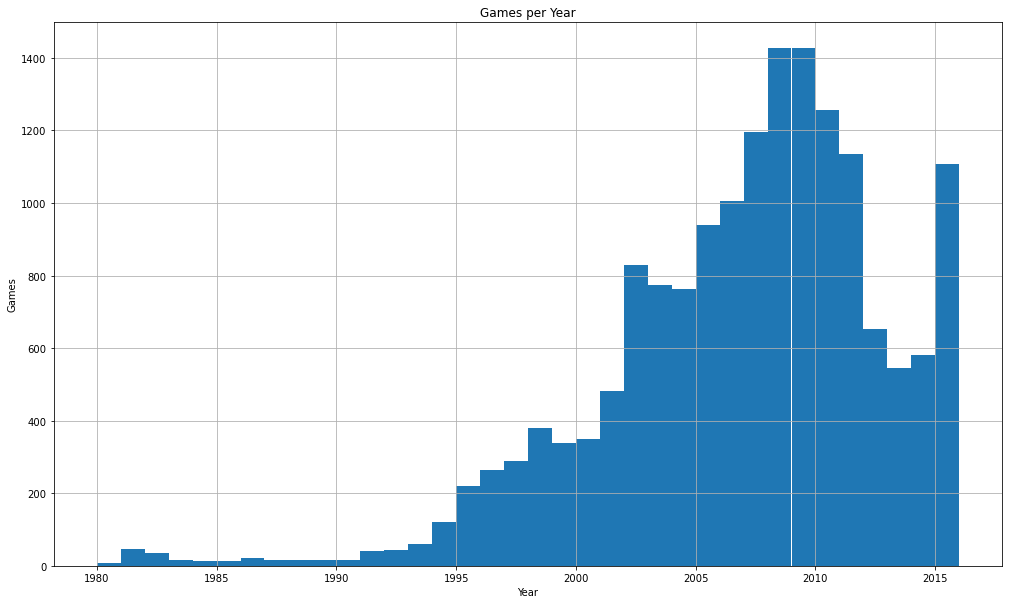

In [14]:
# Plotting a histogram for the total number of games released per year 

filtered_year.year_of_release.hist(bins=36, figsize=(17,10)) 
pl.title("Games per Year")
pl.xlabel("Year")
pl.ylabel("Games");

We can see how the gaming industry was producing, in total, less than 200 games per year before the year 1995. This industry had a significant and steady increase in production after the year 2000 that lasted until year 2010, when it was subject to a sudden decline in the number of games produced. This decline lasted until the year 2016, when the production level increased rapidly again.

Since our goal is to plan a campaign for year 2017, and the gaming technologies change very rapidly, we shall consider the data concerning games produced before year 2006 as irrelevant for our analysis. One decade should be enough to forecast the market for 2017. 

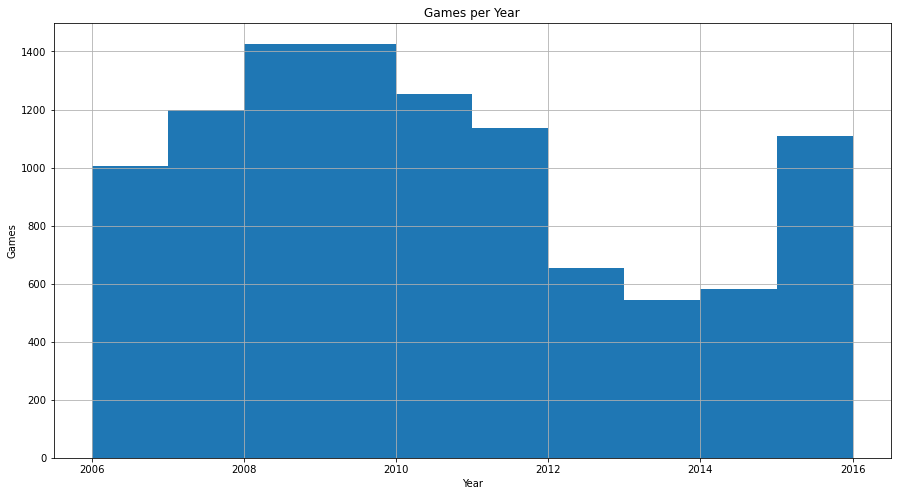

In [15]:
# Filtering for games released from the year 2006 on.

filtered_year = filtered_year.query('year_of_release >= 2006')
filtered_year.year_of_release.hist(bins=10, figsize=(15, 8)) 
pl.title("Games per Year")
pl.xlabel("Year")
pl.ylabel("Games");

Now let's look at how sales varied from platform to platform. 

First, let's look for the platforms that sold the most, in total. 

### Total Sales per Platform

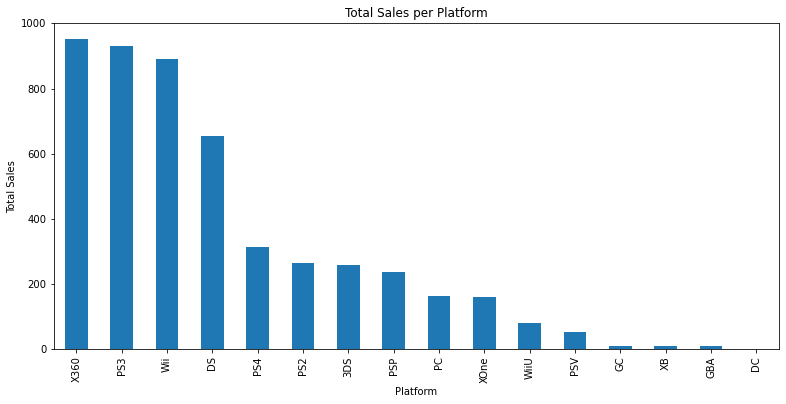

In [16]:
grouped_data = filtered_year.groupby('platform')['total_sales'].sum().sort_values(ascending=False)
grouped_data.plot(kind='bar', figsize=(13,6))
pl.title("Total Sales per Platform")
pl.xlabel("Platform")
pl.ylabel("Total Sales");

We can see that the three platforms that sold the most in total are: X360, PS3 and Wii. 

However, to get a better picture of which are the leading platforms, we shall use the Z Score, which describes the distance from the average total sales value.

#### Calculating Z Score

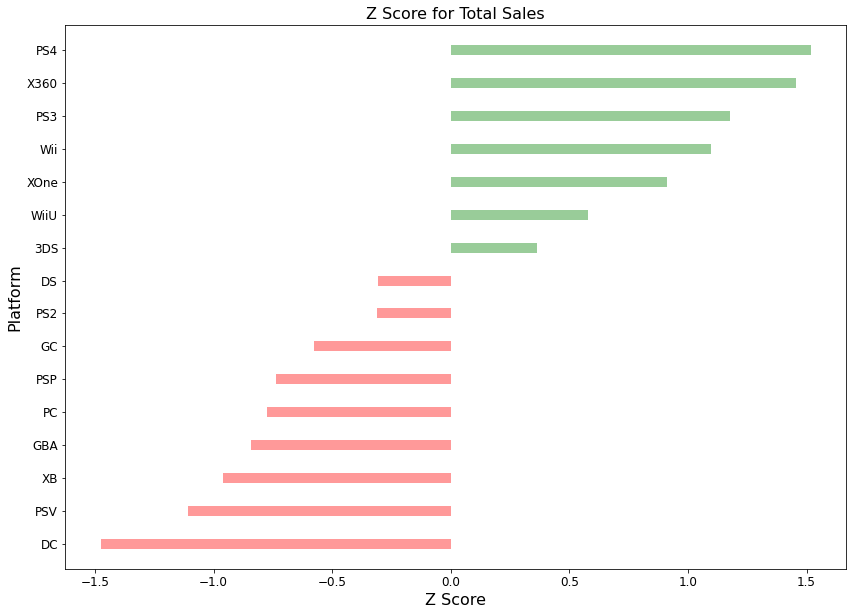

In [17]:
# Creating a table for the average sales per platform 

sales_by_platform = filtered_year[['platform', 'total_sales']].groupby('platform')['total_sales'].mean().sort_values().reset_index()

# Calculating the Z Score: 

sales_by_platform['sales_z'] = (sales_by_platform['total_sales'] - sales_by_platform['total_sales'].mean())/(sales_by_platform['total_sales'].std())

# Setting positive values as green and negative to red: 

sales_by_platform['colour'] = ['red' if x<0 else 'green' for x in sales_by_platform['sales_z']]

# Plotting the graph 

plt.figure(figsize = (14,10))
plt.title('Z Score for Total Sales', size = 16)
plt.ylabel('Platform', size = 16)
plt.xlabel('Z Score', size = 16)
plt.hlines(y=sales_by_platform['platform'], xmin=0, xmax=sales_by_platform.sales_z, color=sales_by_platform.colour, alpha=0.4, linewidth=10)
plt.tick_params(axis='both', which='major', labelsize = 12);

By calculating the Z Score, we can see that the three most popular platforms are PS4, X360, PS3 and Wii.

Let's analyze the distribution of these four platforms based on data for each year

In [18]:
# Creating three tables for the four most successful platforms

ps4 = filtered_year.query('platform == "PS4"')
ps3 = filtered_year.query('platform == "PS3"')
x360 = filtered_year.query('platform == "X360"')
wii = filtered_year.query('platform == "Wii"')
ps4.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62
77,FIFA 16,PS4,2015,Sports,1.12,6.12,0.06,1.28,82.0,4.3,E,8.58
87,Star Wars Battlefront (2015),PS4,2015,Shooter,2.99,3.49,0.22,1.28,NaN,NaN,NaN,7.98
92,Call of Duty: Advanced Warfare,PS4,2014,Shooter,2.81,3.48,0.14,1.23,83.0,5.7,M,7.66


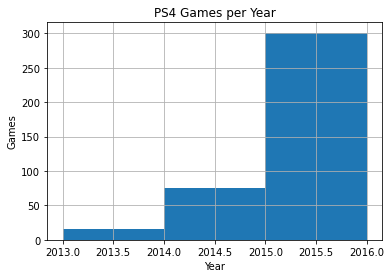

In [19]:
ps4['year_of_release'].hist(bins = 3)
pl.title("PS4 Games per Year")
pl.xlabel("Year")
pl.ylabel("Games");

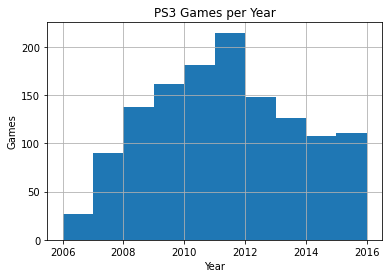

In [20]:
ps3.year_of_release.hist(bins = 10)
pl.title("PS3 Games per Year")
pl.xlabel("Year")
pl.ylabel("Games");

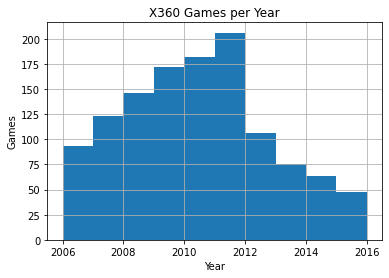

In [21]:
x360.year_of_release.hist(bins=10)
pl.title("X360 Games per Year")
pl.xlabel("Year")
pl.ylabel("Games");

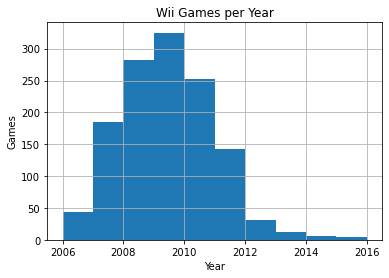

In [22]:
wii.year_of_release.hist(bins = 10)
pl.title("Wii Games per Year")
pl.xlabel("Year")
pl.ylabel("Games");

X360


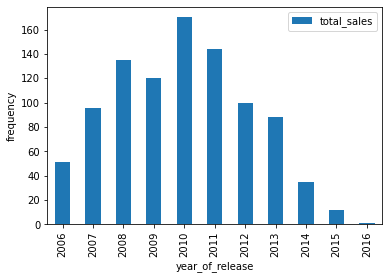

PS3


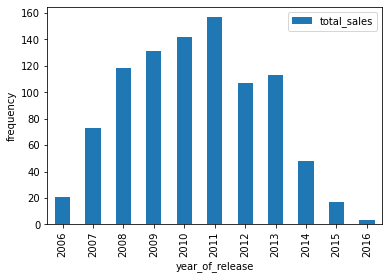

Wii


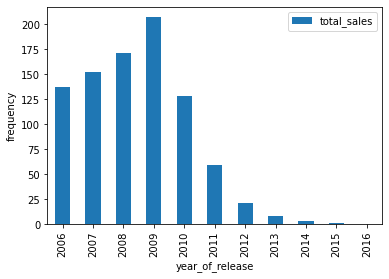

DS


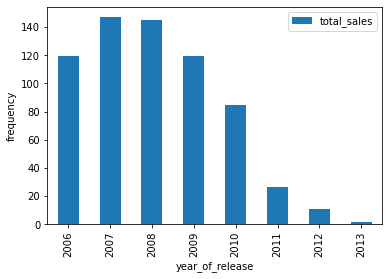

PS4


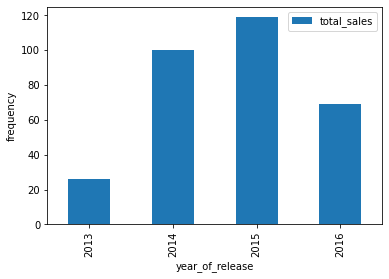

PS2


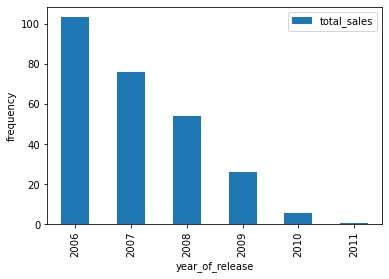

In [23]:
#Reviewer's code
platform_sales = (
    filtered_year
    .pivot_table(index='platform', values='total_sales', aggfunc='sum')
    .sort_values('total_sales', ascending=False)
)
for platform in platform_sales.index[:6]:
    print(platform)
    (filtered_year
     .query('platform == @platform')
     .pivot_table(index='year_of_release', values='total_sales', aggfunc='sum')
     .plot(kind='bar')
    )
    plt.ylabel('frequency')
    plt.show()

By analyzing the distribution per year for the four most succesfull platforms (in terms of total sales), we can see clearly that it typically takes a platform 4 to 5 year to reach it's maximum rate of games released per year. After reaching this peak, the productivity of these platforms descreases rapidly, and it typically takes another 4 to 5 years to fade away completely. 

Keeping this in mind, we can predict the productivity of the four platforms for the year 2017:

    PlayStation 4 seems to be on the rise and about to reach it's peak in year 2017. 

    PlayStation 3 and X360 both reached their peak in the year 2011 and are on the decline. However, they have not faded out completely yet, and are likely to release some more profitable games before disappearing from the market. 
    
    Wii reached it's peak in the year 2009, and the number of games published per year has decreased drastically ever since. My guess is that they will disappear from the market in 2017.


Let's have a look at the general statistics for the total sales of these four platforms.

In [24]:
ps4.total_sales.describe()

count    392.000000
mean       0.801378
std        1.609456
min        0.010000
25%        0.060000
50%        0.200000
75%        0.730000
max       14.630000
Name: total_sales, dtype: float64

In [25]:
ps3.total_sales.describe()

count    1306.000000
mean        0.713124
std         1.403065
min         0.000000
25%         0.110000
50%         0.280000
75%         0.760000
max        21.050000
Name: total_sales, dtype: float64

In [26]:
wii.total_sales.describe()

count    1286.000000
mean        0.692986
std         3.165022
min         0.010000
25%         0.090000
50%         0.190000
75%         0.487500
max        82.540000
Name: total_sales, dtype: float64

In [27]:
x360.total_sales.describe()

count    1214.000000
mean        0.785000
std         1.642714
min         0.010000
25%         0.110000
50%         0.280000
75%         0.777500
max        21.820000
Name: total_sales, dtype: float64

By analyzing the four platforms with the highest sales, we can see that the average sales per game is in the range between 0.5 and 0.8, and the medians range from 0.19 to 0.28. This significant difference between the mean and the median can be explained by the few games that sell significantly more than the rest, reaching even the value of 80 million USD, in the case of Wii. 

In all four platforms we can see that there are a few games that generate an enourmous revenue (pulling the mean value far from the median), while most games sell less than 1 million USD. 

In this section we had a look at the distribution of the total number of games released per year, and then we narrowed down our analysis to games that were released after 2006, to get a better picture of the overall gaming market over the years.

Then we determined which platforms sold the most, and analyzed the average sales per year of the most popular platforms. 
    
We found that, typically, it takes a new platform approximately 4 or 5 years to reach it's peak, and another 4 to 5 years to fade out of the market. 
    
We also discovered that a very small amount of games produce a very big revenue, almost 100 fold bigger than the average revenue per game

## Potentially Profitable Platforms

Now we can narrow down our research even more, taking into consideration the gaming market from the 2013 on.

In [28]:
filtered_year = filtered_year.query('year_of_release >= 2013')
filtered_year.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
16,Grand Theft Auto V,PS3,2013,Action,7.02,9.09,0.98,3.96,97.0,8.2,M,21.05
23,Grand Theft Auto V,X360,2013,Action,9.66,5.14,0.06,1.41,97.0,8.1,M,16.27
31,Call of Duty: Black Ops 3,PS4,2015,Shooter,6.03,5.86,0.36,2.38,NaN,NaN,NaN,14.63
33,Pokemon X/Pokemon Y,3DS,2013,Role-Playing,5.28,4.19,4.35,0.78,NaN,NaN,NaN,14.60
42,Grand Theft Auto V,PS4,2014,Action,3.96,6.31,0.38,1.97,97.0,8.3,M,12.62


Let's analyze which platforms are shrinking and which are growing, in order to find which platforms to concentrate the campaign for 2017 on. 

In [29]:
# Creating pivot table to view total sales per year for each platform

platform_growth = pd.pivot_table(filtered_year, index='year_of_release', columns='platform', values='total_sales', aggfunc='sum', fill_value=0)

In [30]:
# Inverting and viewing pivot table

platform_growth.T.head()

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,56.57,43.76,27.78,15.14
DS,1.54,0.00,0.00,0.00
PC,12.38,13.28,8.52,5.25
PS3,113.25,47.76,16.82,3.60
PS4,25.99,100.00,118.90,69.25


Let's use the shift function to compare the sales of each year to the previous one.

In [31]:
# Applying shift() function 

dynamics = platform_growth - platform_growth.shift(+1)

# Viewing the new pivot table

dynamics.T.head()

year_of_release,2013,2014,2015,2016
platform,,,,
3DS,NaN,-12.81,-15.98,-12.64
DS,NaN,-1.54,0.00,0.00
PC,NaN,0.90,-4.76,-3.27
PS3,NaN,-65.49,-30.94,-13.22
PS4,NaN,74.01,18.90,-49.65


In order to make viewing easier, let's view a heatmap for this data.

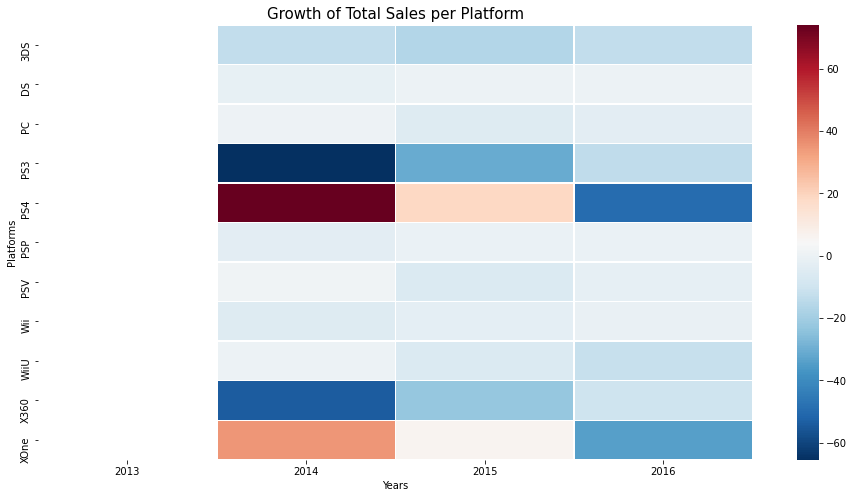

In [32]:
# Plotting heatmap

plt.figure(figsize=(16,8))
sns.heatmap(dynamics.T, cmap="RdBu_r", linewidths=.5)

# Adding labels

plt.title('Growth of Total Sales per Platform',fontsize=15)
plt.ylabel('Platforms') 
plt.xlabel('Years') 
plt.show()

Red colors indicate growth, while blue indicates shrinkage. The darker the color, the more intense is the growth/shrinkage. Lighter colors, instead, indicate a smaller difference compared to the previous year. 

By analyzing this heatmap we can see that, in general, all of the platforms are either shrinking or growing very slowly.

As we saw earlier, PlayStation 4 had a significant increase in sales in 2014 and 2015, but sales have shrunk in 2016. 

Since the gaming industry is rapidly changing, and platforms become obsolete very fast, in this section we decided to use data only from the year 2013 on. 
    
We then plotted a heat map to find out which platforms are shrinking and which are growing. We found that all the platforms considered had a slight decrease in sales in the year 2016.

## Global Sales by Platform

Let's have a look at the global sales broken down by platform, by using boxplots. 

In [33]:
# Grouping the data by platform and year_of_release and calculating the sum of total_sales

grouped = filtered_year.groupby('platform')['total_sales'].sum().reset_index()

# Sorting values

ordered = grouped.groupby(['platform'])['total_sales'].sum().sort_values(ascending = False).reset_index()['platform']

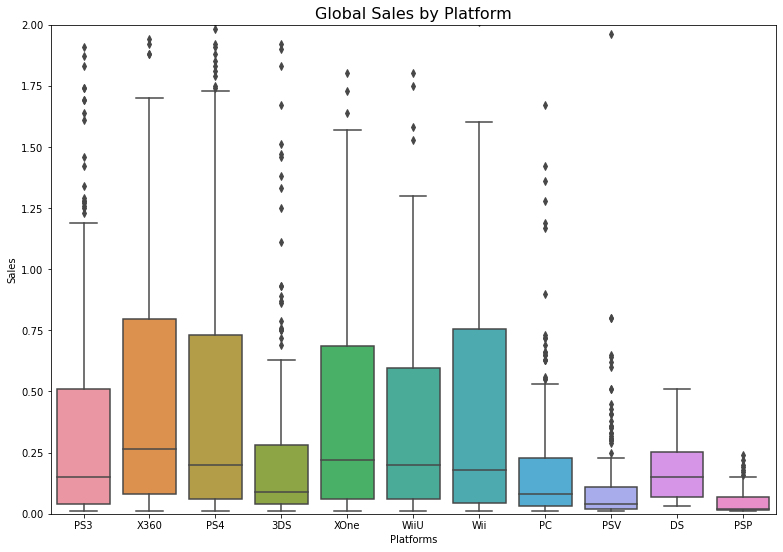

In [34]:
# Plotting Box Plot

plt.figure(figsize=(13, 9))
sns.boxplot(x='platform', y='total_sales', data=filtered_year)
plt.title('Global Sales by Platform', fontsize=16)
plt.ylabel('Sales') 
plt.xlabel('Platforms') 

# Defining the limit of Y axis

plt.ylim(0, 2)


plt.show()

<div style="border:solid orange 2px; padding: 20px"> <b>Remarks V2:</b><br>
    Please, watch the video below. This is about boxplots, you  might be interested in:
     <ul>
        <li><a>https://youtu.be/L68iieC2Vgc</a></li>  
</div>    

As we saw earlier, Wii is the plaform that has the highest variance: while the median sales per game is relatively low, it has a few outliers that pull the mean higher. 

<div style="border:solid red 2px; padding: 20px"> <b>Needs fixing:</b><br>
    Please don't forget to write the conclusion here .</div>

## Effect of User and Critic Ratings on Sales

Now let's check the correlation of user and critic ratings on sales for the four most popular platforms. 

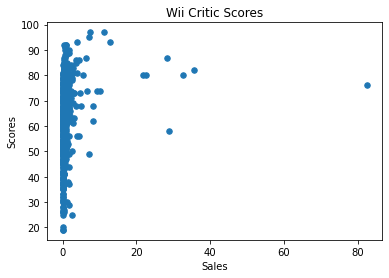

In [35]:
wii = wii[wii['critic_score'].notnull()]

wii.plot.scatter(x = 'total_sales', y = ('critic_score'), s = 30)

pl.title("Wii Critic Scores")
pl.xlabel("Sales")
pl.ylabel("Scores");



In [36]:
wii[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.177907
total_sales,0.177907,1.000000


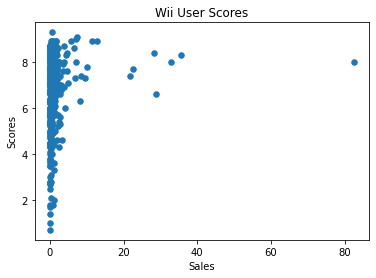

In [37]:
wii = wii[wii['user_score'].notnull()]
wii['user_score'].astype('float')
wii.plot.scatter(x = 'total_sales', y = ('user_score'), s = 30)

pl.title("Wii User Scores")
pl.xlabel("Sales")
pl.ylabel("Scores");

In [38]:
wii[['user_score', 'total_sales']].corr()


,user_score,total_sales
user_score,1.000000,0.110637
total_sales,0.110637,1.000000


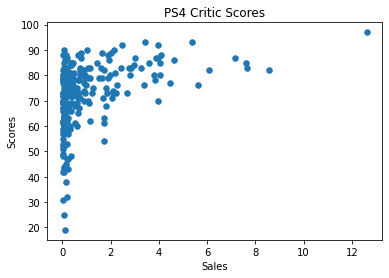

In [39]:
ps4 = ps4[ps4['critic_score'].notnull()]

ps4.plot.scatter(x = 'total_sales', y = ('critic_score'), s = 30)

pl.title("PS4 Critic Scores")
pl.xlabel("Sales")
pl.ylabel("Scores");

In [40]:
ps4[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.406568
total_sales,0.406568,1.000000


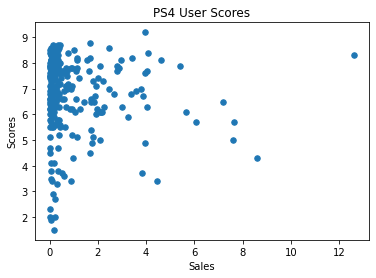

In [41]:
ps4 = ps4[ps4['user_score'].notnull()]
ps4['user_score'].astype('float')
ps4.plot.scatter(x = 'total_sales', y = ('user_score'), s = 30)

pl.title("PS4 User Scores")
pl.xlabel("Sales")
pl.ylabel("Scores");

In [42]:
ps4[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,-0.033625
total_sales,-0.033625,1.000000


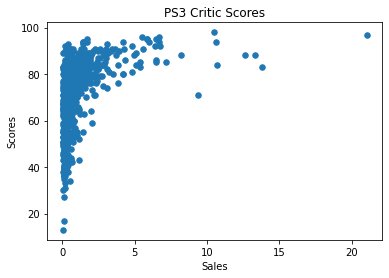

In [43]:
ps3 = ps3[ps3['critic_score'].notnull()]

ps3.plot.scatter(x = 'total_sales', y = ('critic_score'), s = 30)

pl.title("PS3 Critic Scores")
pl.xlabel("Sales")
pl.ylabel("Scores");

In [44]:
ps3[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.432759
total_sales,0.432759,1.000000


<ipython-input-45-1a0bf97e3be2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ps3['user_score'] = ps3['user_score'].astype('float')


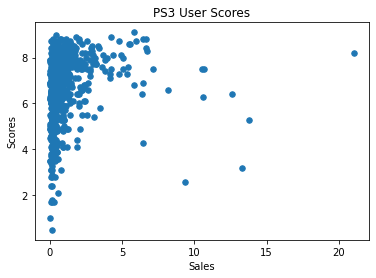

In [45]:
ps3 = ps3[ps3['user_score'].notnull()]
ps3['user_score'] = ps3['user_score'].astype('float')
ps3.plot.scatter(x = 'total_sales', y = ('user_score'), s = 30)

pl.title("PS3 User Scores")
pl.xlabel("Sales")
pl.ylabel("Scores");

In [46]:
ps3[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.143978
total_sales,0.143978,1.000000


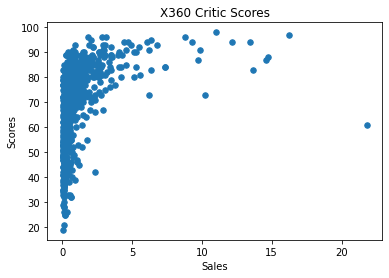

In [47]:
x360 = x360[x360['critic_score'].notnull()]

x360.plot.scatter(x = 'total_sales', y = ('critic_score'), s = 30)

pl.title("X360 Critic Scores")
pl.xlabel("Sales")
pl.ylabel("Scores");

In [48]:
x360[['critic_score', 'total_sales']].corr()

,critic_score,total_sales
critic_score,1.000000,0.396307
total_sales,0.396307,1.000000


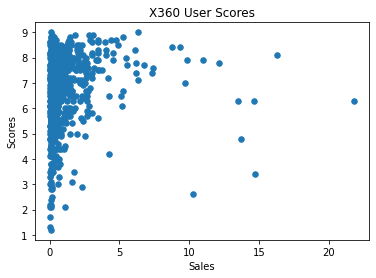

In [49]:
x360 = x360[x360['user_score'].notnull()]
x360['user_score'].astype('float')
x360.plot.scatter(x = 'total_sales', y = ('user_score'), s = 30)

pl.title("X360 User Scores")
pl.xlabel("Sales")
pl.ylabel("Scores");

In [50]:
x360[['user_score', 'total_sales']].corr()

,user_score,total_sales
user_score,1.000000,0.111855
total_sales,0.111855,1.000000


By analyzing the scatter plots we can see that there is some relation between the ratings and the sales for each platform. 

By analyzing the correlation coefficient we can notice the following:

    1) The correlation between critic scores and sales for each platform is always higher that the one for the user scores. This suggest that the critic's opinion is of more importance for potential buyers. Or it could indicate that the critic scores are usually published before the user scores, therefore their influence on potential buyers is more significant (most user scores are published when a significant amount of copies of the games have already been sold). 
    
    2) The correlation varies significantly from platform to platform. The highest correlation coefficient is for PS3, whose value is 0.43.
    
    3) Although we do see positive correlations between scores and sales, they are not very strong. In the case of user scores for PS4, we even see a negative correlation. This negative correlation, however, is very close to 0, therefore it can be considered as no correlation. 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Technically everything is correct here but after you fix the actual period, please don't forget to fix this point too.</div>

<div style="border:solid red 2px; padding: 20px"> <b>Needs fixing V2:</b><br>
    Please, pay attention that you don't use the actual period here (from 2013).</div>

## Distribution of Sales per Genre

Let's look at the general distribution of sales per genre.

,total_sales
genre,
Action,1744.17
Adventure,237.59
Fighting,447.53
Misc,802.51
Platform,827.77
Puzzle,242.57
Racing,728.67
Role-Playing,934.56
Shooter,1052.45


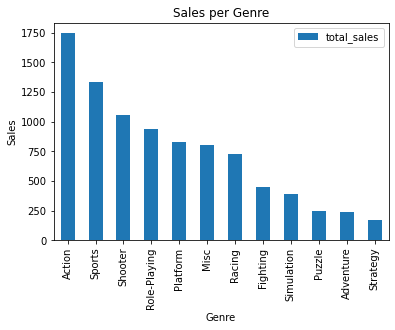

In [51]:
sales_genre = df.pivot_table(index=['genre'], values=['total_sales'], aggfunc='sum')
sales_genre.sort_values('total_sales', ascending=False).plot(kind='bar')
pl.title("Sales per Genre")
pl.xlabel("Genre")
pl.ylabel("Sales");
sales_genre

The most popular genres are: Action, Sports and Shooter.

The least popular genres are: Puzzle, Adventure and Strategy. 

<div style="border:solid green 2px; padding: 20px"> <b>Success:</b><br>
    Great job!</div>

## Looking for the top Platforms for each Region

Now let's see which are the top 5 platforms for each region: North America, Europe and Japan. 

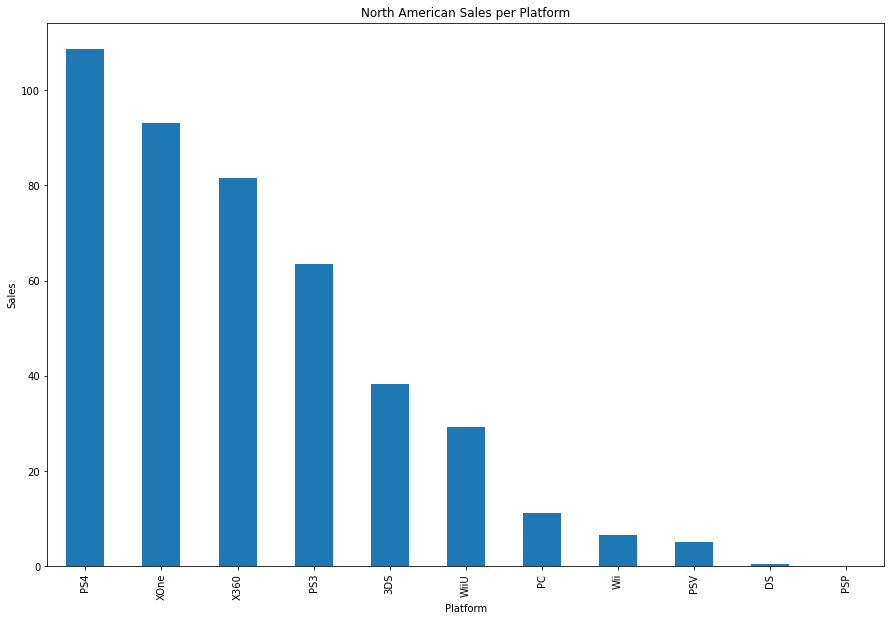

In [52]:
sales_na = filtered_year.groupby('platform')['na_sales'].sum().sort_values(ascending=False)
sales_na.plot(kind='bar', figsize=(15, 10))
pl.title("North American Sales per Platform")
pl.xlabel("Platform")
pl.ylabel("Sales");

The leading platforms in the North American market are: PS4, XOne and X360.

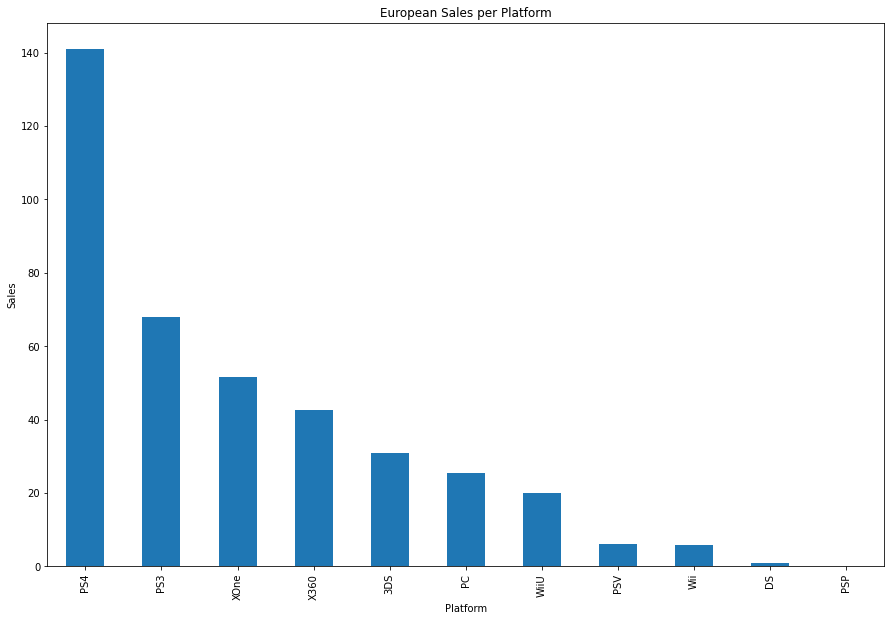

In [53]:
sales_eu = filtered_year.groupby('platform')['eu_sales'].sum().sort_values(ascending=False)
sales_eu.plot(kind='bar', figsize=(15, 10))
pl.title("European Sales per Platform")
pl.xlabel("Platform")
pl.ylabel("Sales");

The leading platforms in the European market are:  PS4, PS3, XOne and x360. 

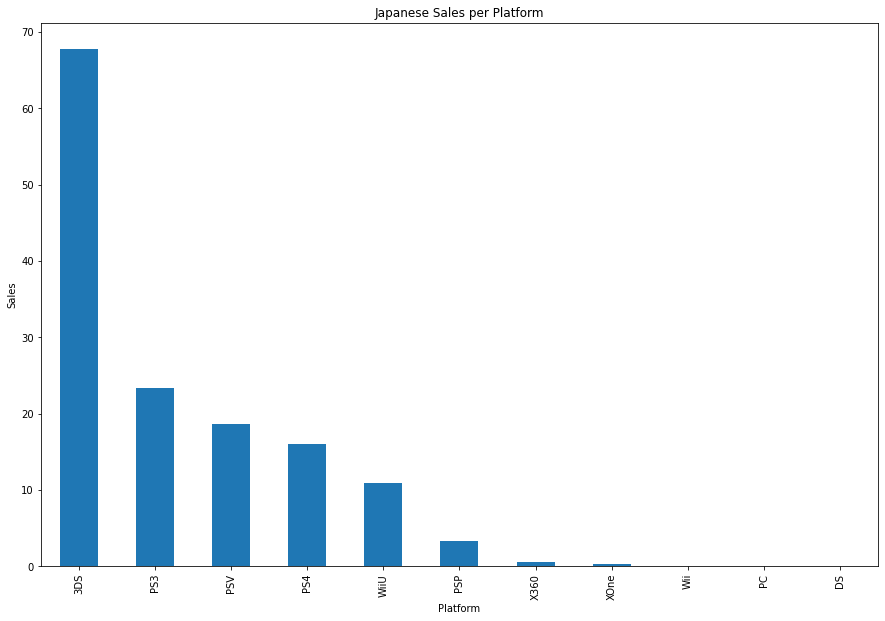

In [54]:
sales_jp = filtered_year.groupby('platform')['jp_sales'].sum().sort_values(ascending=False)
sales_jp.plot(kind='bar', figsize=(15, 10))
pl.title("Japanese Sales per Platform")
pl.xlabel("Platform")
pl.ylabel("Sales");

The leading platforms in the Japanese market are: 3DS, PS3 and PSV.

Let's analyze which genres of games are the most popular in each of these regions.

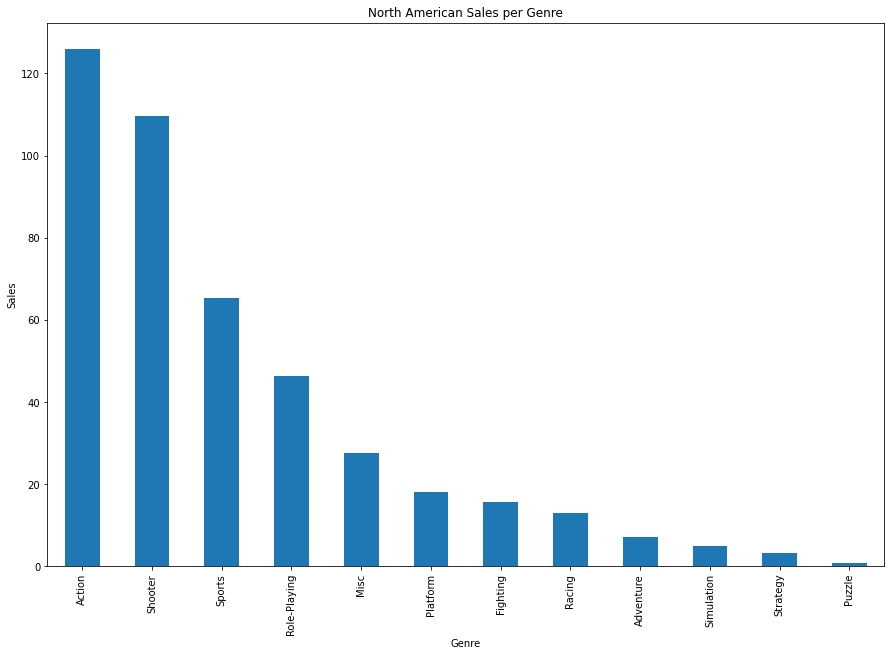

In [55]:
genres_na = filtered_year.groupby('genre')['na_sales'].sum().sort_values(ascending=False)
genres_na.plot(kind='bar', figsize=(15, 10))
pl.title("North American Sales per Genre")
pl.xlabel("Genre")
pl.ylabel("Sales");

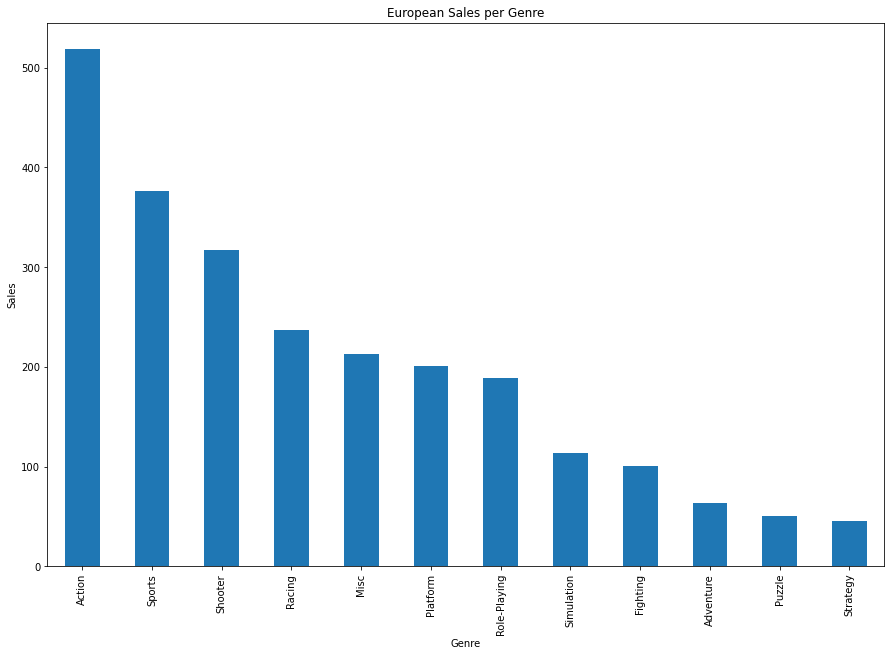

In [56]:
genres_eu = df.groupby('genre')['eu_sales'].sum().sort_values(ascending=False)
genres_eu.plot(kind='bar', figsize=(15, 10))
pl.title("European Sales per Genre")
pl.xlabel("Genre")
pl.ylabel("Sales");

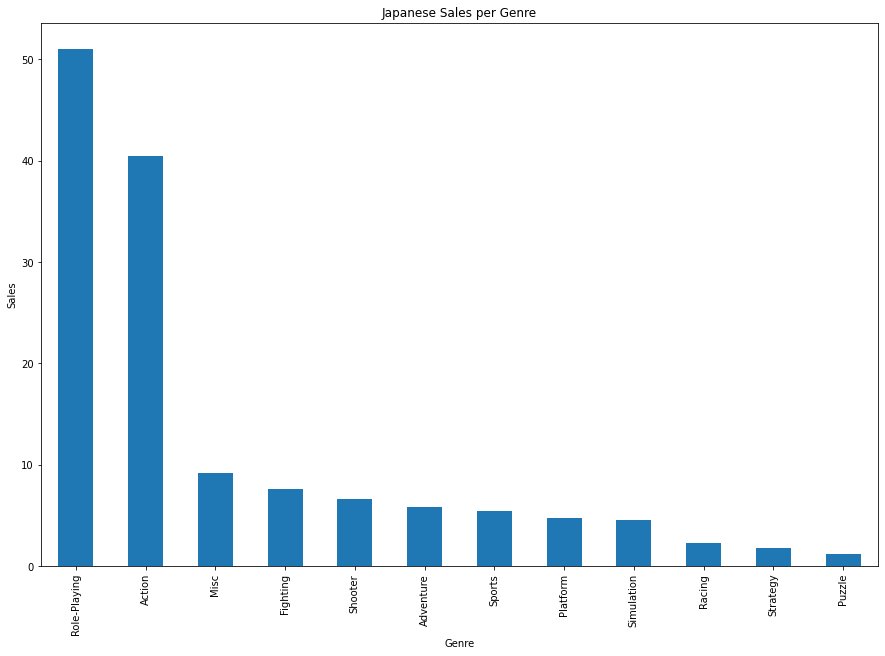

In [57]:
genres_jp = filtered_year.groupby('genre')['jp_sales'].sum().sort_values(ascending=False)
genres_jp.plot(kind='bar', figsize=(15, 10))
pl.title("Japanese Sales per Genre")
pl.xlabel("Genre")
pl.ylabel("Sales");

We notice a significant difference in the preferences of the Japanese market compared to the other two markets: Japanese gamers tend to prefer the "Role Playing" genre by far, compared to all other genres. The same genre comes at the 4th place in the North American market and at 7th place in the European market. 

The "Shooter" category, however, seems to be the one of the least favorite genre for Japanese gamers, while it comes at third place for both European and North American markets. 

We also notice that the "Platform" genre is more popular in North America and Japan than in the European market, while the "racing" genre is more popular in Europe compared to the other two markets.

Now let's analyze the impact of the ESRB rating on the sales for each region. 

Here is an explanation for the ESRB categories: 

    E = Everyone (suitable for everyone)

    E10+ = Everyone 10 + (suitable for ages 10 and up)

    T = Teen (suitable for ages 13 and up)

    M = Mature (suitable for ages 17 and up)

    AO = Adults Only (suitable for ages 18 and up)

    RP = Rating Pending

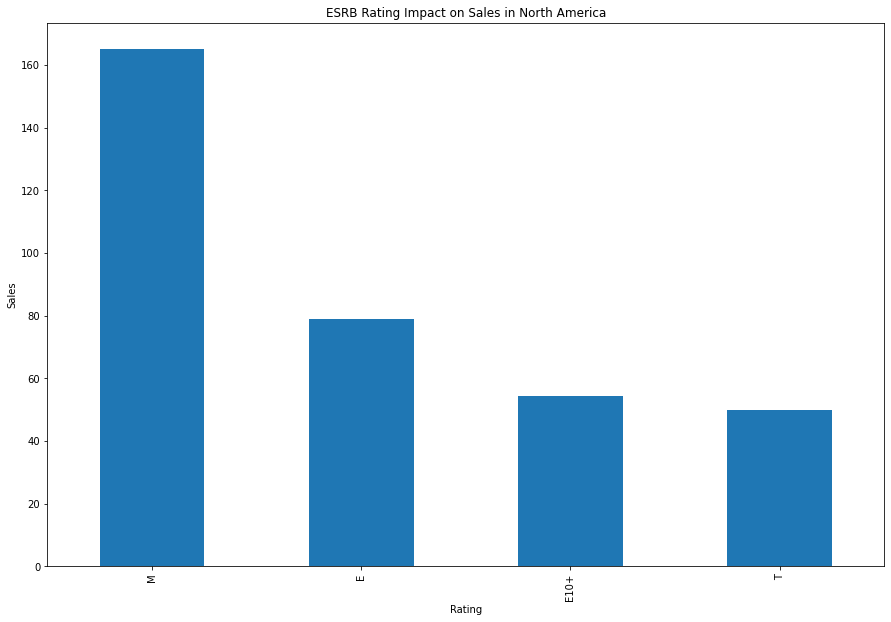

In [58]:
rating_na = filtered_year.groupby('rating')['na_sales'].sum().sort_values(ascending=False)
rating_na.plot(kind='bar', figsize=(15, 10))
pl.title("ESRB Rating Impact on Sales in North America")
pl.xlabel("Rating")
pl.ylabel("Sales");

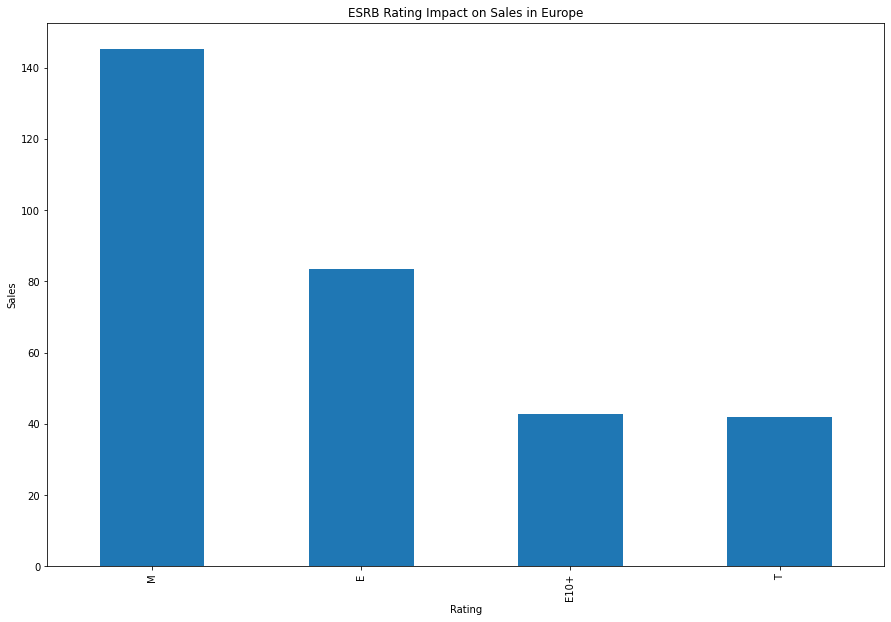

In [59]:
rating_eu = filtered_year.groupby('rating')['eu_sales'].sum().sort_values(ascending=False)
rating_eu.plot(kind='bar', figsize=(15, 10))
pl.title("ESRB Rating Impact on Sales in Europe")
pl.xlabel("Rating")
pl.ylabel("Sales");

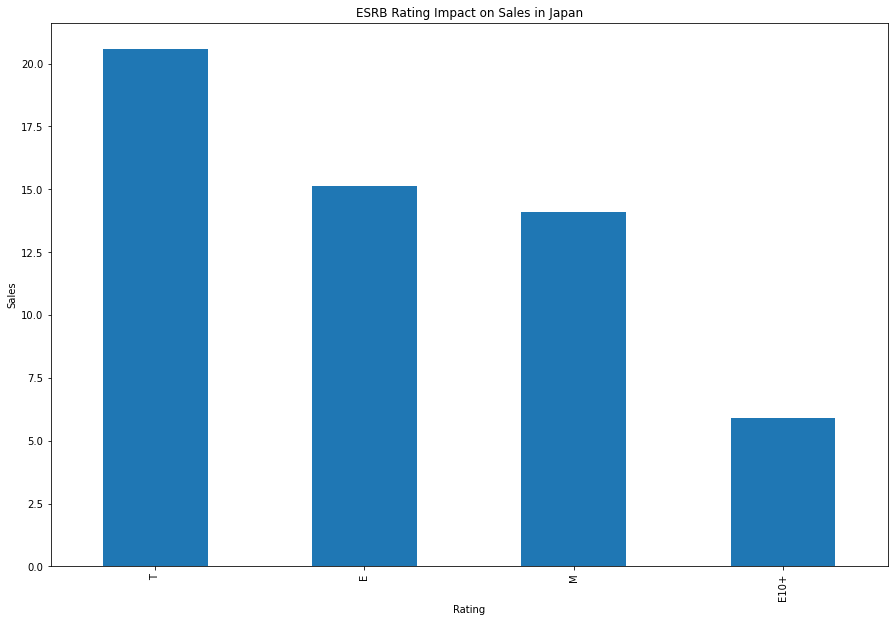

In [60]:
rating_jp = filtered_year.groupby('rating')['jp_sales'].sum().sort_values(ascending=False)
rating_jp.plot(kind='bar', figsize=(15, 10))
pl.title("ESRB Rating Impact on Sales in Japan")
pl.xlabel("Rating")
pl.ylabel("Sales");

By comparing the sales for each region grouped by the ESRB rating, we can see that the most common category in Europe and North America is M (mature), while in Japan the most common category is T (teen). 

This fact might suggest that the Japanese gaming market is dominated by teenagers, and fewer gamers are aged 17 and up. In the European and North American markets, however, there are many more "mature" gamers.  

### Conclusions

In this section we analyzed the regional market preferences for platforms, genre and category, and we found significant differences from region to region. 

By analyzing regional preferences we discovered the following:
    
    1) In Europe, the most popular platform is by far PlayStation 4. This platform is twice as popular than PS3, which is the second most popular platform.
    
    2) PlayStation 4 is also the most popular platform in North America. However, the difference compared to the other leading platforms (PS3 and XOne) is not as big as in Europe. 
    
    3) In Japan, instead, we see a completely different distribution: the most popular platform in 3DS, which is almost three times as popular as the second ranking, PS3. Other platforms that rank highest in the other markets, like X360 and XOne, are almost inexistent in the Japanese market. Also, we see that PSV is quite popular in Japan, while it's market share in the other regions is almost inexistent. 
    
    4) Japanese gamers prefer "Role Playing" and "Action" games by far compared to all other catgories, while they don't go crazy for "Shooter" games, which are a very popular category in the other regions. 
    
    5) It seems that the typical Japanese gamer is a teenager, while older people tend to play less, compared to the European and American markets. 


## Testing Hypotheses

### Average user ratings of the Xbox One and PC belong to the same statistical population.

These are our null and alternative hypotheses:
    
    H0: Average user ratings by the platform Xbox One and PC belong to the same statistical population 
    H1: Average user ratings by the platform Xbox One and PC don't belong to the same statistical population.

The statistical insignificant difference level will be set to 5%.



First I will create a function to test hypotheses.

In [61]:
def hypothesis(alpha,data1,data2,eq_var):
    results = st.ttest_ind(data1,data2, equal_var = eq_var)
    print('p-value: {:.18f}'.format(results.pvalue))
    # if the p-value is less than alpha, we reject the hypothesis
    if results.pvalue < alpha:
        print("We reject the null hypothesis")
    else:
        print("We can't reject the null hypothesis") 

Now let's check if the variance for the two platforms can be considered equal or not. 

Let's first check the ratio between the two variances. 

In [77]:
xbox_var = filtered_year.query('platform=="XOne"')['user_score'].var()
pc_var = filtered_year.query('platform=="PC"')['user_score'].var()
var_ratio = (xbox_var/pc_var)
print('Variance for Xbox:', xbox_var)
print('Variance for PC:', pc_var)
print('Ratio of the two variances:', var_ratio)

Variance for Xbox: 1.9069968429360702
Variance for PC: 3.035892752408884
Ratio of the two variances: 0.6281502669759756


The ratio between the two variances is not far from 1. Let's perform a Levene test two determine if the variances can be considered equal. 

In [72]:
xbox = filtered_year.query('platform=="XOne"')['user_score'].dropna()
pc = filtered_year.query('platform=="PC"')['user_score'].dropna()
results = st.levene(xbox, pc)

In [74]:
results

LeveneResult(statistic=8.44812129543499, pvalue=0.003897553110130418)

The low p-value suggests that the variances for the scores for these two platforms are not equal. 

Now we can check our hypothesis.

In [84]:
eq_var = False
alpha = 0.05
hypothesis(alpha, xbox, pc, eq_var)

p-value: 0.147595940134304632
We can't reject the null hypothesis


We can't reject the null hypothesis, therefore we can say that the average user scores for the two platforms belong to the same statistical population. 

Now let's check the average scores for the two platforms:

In [ ]:
filtered_year.query('platform=="XOne"')['user_score'].mean()

In [ ]:
filtered_year.query('platform=="PC"')['user_score'].mean()

The average user score for XBox One platform is significantly higher than the average user score for PC. 

Now let's check our second hypothesis. 

### Average user ratings for the Action and Sports genres belong to a different statistical population. 

These are our null and alternative hypotheses:
    
    H0: Average user ratings for Action and Sport genres belong to the same statistical population 
    H1: Average user ratings for Action and Sport genres don't belong to the same statistical population.

The statistical insignificant difference level will be set to 5%. 


Like we did earlier, let's check first if the two variances can be considered equal. 

In [80]:
action_var = filtered_year.query('genre=="Action"')['user_score'].var()
sports_var = filtered_year.query('genre=="Sports"')['user_score'].var()
var_ratio_genre = action_var/sports_var
print('Variance for Action Genre:', action_var)
print('Variance for Sports Genre:', sports_var)
print('Ratio between variances:', var_ratio_genre)

Variance for Action Genre: 1.76936090424827
Variance for Sports Genre: 3.1806128144654062
Ratio between variances: 0.5562955969369262


Variance for Sports is almost twice the variance for Action. Again, let's perform a Levene test to check if they are significantly different. 

In [81]:
action = filtered_year.query('genre=="Action"')['user_score'].dropna()
sports = filtered_year.query('genre=="Sports"')['user_score'].dropna()
results = st.levene(action, sports)
results

LeveneResult(statistic=26.20600718947607, pvalue=4.2566688218274047e-07)

The p-value is extremely low: the difference between the variances is statistically significant. 

In [83]:
eq_var = False
alpha = 0.05
hypothesis(alpha, action, sports, eq_var)

p-value: 0.000000000000000000
We reject the null hypothesis


We reject the null hypothesis, therefore we can say that the average user scores for these two genres differ significantly. 

In [85]:
filtered_year.query('genre=="Action"')['user_score'].mean()


6.837532133676097

In [86]:
filtered_year.query('genre=="Sports"')['user_score'].mean()

5.238124999999999

By looking at the average scores, we can see that users rate Action games higher than Sport games. 

In this section we tested two hypothesis regarding the user scores: :
    
    1) The first hypothesis, that XOne and PC user ratings belong to the same statistical population, could not be rejected. 
    2) The second hypothesis, that the use rratings for Action and Sport genres belong to the same statistical population, could not be rejeted.

Based on these tests, we can say that user ratings for XOne and PC are not considerably different, while user ratings for Action games are considerably higher than ratings for Sport games. 

## Conclusion

By considering all of the above, we can conclude the following: 


### In general, the gaming market is recovering from a decline

We can see that the total amount of games published in 2011 declined drastically, and only in the year 2015 the number of games started growing again. The only exception to this observation is the 3DS platform, which growed considerably in 2011, but has shrunk gradually over the years ever since.

By analyzing the data for each platform, however, we can see that the total sales for all platforms are either shrinking or are subject to a very subtle growth in 2016. 

In my opinion, this is a transition phase, where old platforms are gradually becoming obsolete and are about to disappear from the market, making space for new platforms to penetrate the gaming market. 

This fact makes it hard to forecast which of the platforms will be profitable in 2017. 

However, after analyzing the data, the safest guess would be to concentrate the campaign on PlayStation 4, which has recently reached it's peak, and it will take a few years before it disappears from the market. 

### Regional Preferences

By analyzing the preferred genre, platform and ESRB rating for the three main markets, North America, Europe and Japan, we can clearly see that there are considerable differences between these markets. 

In detail, we see that the Japanese gamer's preferences are very different compared to European and American, while European and American markets seem to have relatively more in common. 

Here are some of the main differences between these markets:

    1) Japanese gamers prefer Role Playing: this category is by far the most popular genre in Japan, but it is not very popular in Europe and North America. 
    
    2) Japanese gamers don't like the Shooter genre: this genre is very popular in North America and Europe (at the third place in both markets), while it is one of the least common in Japan. 
    
    3) European gamers like racing games: Racing ranks at the fourth place in genre popularity in Europe, while it is not so popular in America, and one of the least popular genres in Japan. 
    
    4) Platform preferences: In Europe and North America the most common platforms are PS3, X360 and Wii, while the most popular platforms in Japan are DS and 3DS.
    
    5) ESRB Rating: It seems that the Japanese market for Teens is considerably bigger compared to the Mature category, while the opposite is true in the other two regions. 
    
These regional preferences should be taken into consideration when planning the campaign for 2017: campaigns for the Japanese market should be different from the other two regions. 